La première étape essentielle de notre analyse repose sur la collecte de données, une opération cruciale qui détermine la qualité et la pertinence des informations que nous pouvons extraire. Pour cette étude, nous avons opté pour la récupération de données à partir de fichiers excel disponibles sur Kaggle, une plateforme de partage de données.

A. Sources de données

•	Enquêtes sur les revenus : Nous avons choisi d'utiliser des données provenant d'enquêtes sur les revenus, qui offrent une perspective détaillée des différents aspects des revenus des individus. Ces enquêtes, souvent menées par des organismes gouvernementaux ou des instituts de recherche, comprennent des informations sur l'âge, le niveau d'éducation, l'expérience professionnelle, et d'autres variables pertinentes.
•	Bases de données économiques : En complément des enquêtes sur les revenus, nous avons également exploré des bases de données économiques disponibles sur Kaggle. Ces bases de données peuvent fournir une vue d'ensemble plus large des tendances économiques, des différences entre pays et des fluctuations sur le marché du travail.


B. Format des données


•	Types de variables : Les données que nous avons extraites sont caractérisées par une diversité de variables, parmi lesquelles nous pouvons distinguer les variables numériques (telles que l'âge, le salaire, l'expérience professionnelle) et les variables catégorielles (comme le niveau d'éducation, le pays d'origine, le genre). Cette diversité permettra une analyse approfondie des relations entre ces différentes dimensions.

•	Structure des données : Les fichiers Excel que nous avons obtenus de Kaggle présentent une structure tabulaire, avec des colonnes représentant différentes variables et des lignes correspondant à chaque individu ou observation. Cette organisation facilite le traitement des données à l'aide de bibliothèques Python telles que pandas. Nous explorerons cette structure pour comprendre la distribution des données, détecter d'éventuelles valeurs aberrantes, et préparer les données pour les analyses subséquentes.
En résumé, notre choix de sources de données diversifié, combiné à la nature variée des variables et à la structure tabulaire des fichiers Excel, forme la base de notre exploration approfondie des relations complexes entre l'âge, le niveau d'éducation, le genre, le pays d'origine, l'expérience professionnelle, et les revenus salariaux.


##### **Chapitre2 : Exploration des données**

In [1]:
# importer le module pandas 
import pandas as pd


# lire les données à partir du fichier excel
donnee = pd.read_excel("Salary1.xlsx")


# afficher seulement les 5 premiers lignes
donnee.head() 

Age  Gender  Education Level  Years of Experience    Salary Country
0  32.0    Male                1                  5.0   90000.0      UK
1  28.0  Female                2                  3.0   65000.0     USA
2  45.0    Male                3                 15.0  150000.0  Canada
3  36.0  Female                1                  7.0   60000.0     USA
4  52.0    Male                2                 20.0  200000.0     USA

* **Information sur les données**

In [4]:
#Dimention : Nombre de colonnes et de lignes
dim = donnee.shape
print(f"le nombre de lignes: {dim[0]}")
print(f"le nombre de colonnes: {dim[1]}")

le nombre de lignes: 6684
le nombre de colonnes: 6


In [5]:
#Savoir les types de variables 
donnee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Years of Experience  6684 non-null   float64
 4   Salary               6684 non-null   float64
 5   Country              6684 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 313.4+ KB


* **Faire quelques modifications**

In [2]:
#Ajouter une colonne a une position exacte:
donnee.insert(0, 'ID', range(len(donnee)))

donnee.head()

ID   Age  Gender  Education Level  Years of Experience    Salary Country
0   0  32.0    Male                1                  5.0   90000.0      UK
1   1  28.0  Female                2                  3.0   65000.0     USA
2   2  45.0    Male                3                 15.0  150000.0  Canada
3   3  36.0  Female                1                  7.0   60000.0     USA
4   4  52.0    Male                2                 20.0  200000.0     USA

In [3]:
# modifier la colonne Salary par elle-même divisée par 1000

donnee['Salary'] = donnee['Salary']/1000
donnee.head()

ID   Age  Gender  Education Level  Years of Experience  Salary Country
0   0  32.0    Male                1                  5.0    90.0      UK
1   1  28.0  Female                2                  3.0    65.0     USA
2   2  45.0    Male                3                 15.0   150.0  Canada
3   3  36.0  Female                1                  7.0    60.0     USA
4   4  52.0    Male                2                 20.0   200.0     USA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

plt.figure(figsize=(10, 5))

sns.histplot(data=donnee["Salary"], color='purple')
plt.title("Distribution des salaires ", fontname='arial', fontsize=18)
plt.xlabel('Salaire', fontname='arial', fontsize=18)
plt.ylabel('Nombre', fontname='arial', fontsize=18)

plt.show()

##### **Chapitre3 : Analyse de la relation entre l'âge et le salaire**

* **Filtrage** 

* Sélection via des indices 

In [8]:
# sélectionner l'age et le salaires:
age_salaire=donnee.iloc[:, [1,5]]
age_salaire.head()

Age  Salary
0  32.0    90.0
1  28.0    65.0
2  45.0   150.0
3  36.0    60.0
4  52.0   200.0

* **Tri**

In [9]:
# trier selon le salaire :
age_salaire.sort_values(['Salary'])

Age   Salary
258   29.0    0.350
4615  31.0    0.500
1888  25.0    0.550
2640  23.0    0.579
4488  30.0   25.000
...    ...      ...
4258  51.0  240.000
4363  51.0  240.000
4983  45.0  250.000
83    52.0  250.000
30    50.0  250.000

[6684 rows x 2 columns]

In [23]:
# trier selon l'age :
age_salaire.sort_values(['Age'])

Age  Salary
5104  21.0    25.0
4879  21.0    25.0
4892  21.0    25.0
4905  21.0    25.0
4918  21.0    25.0
...    ...     ...
1223  62.0   200.0
1303  62.0   200.0
1234  62.0   200.0
1256  62.0   200.0
1302  62.0   200.0

[6684 rows x 2 columns]

* **Analyse descriptive**

In [30]:
#Calculer la moyenne des salaires par age

moyenne_des_salaires_par_age = donnee.groupby('Age')['Salary'].mean()
moyenne_des_salaires_par_age.head()

Age
21.0    25.000000
22.0    32.910933
23.0    46.884951
24.0    51.052250
25.0    63.692787
Name: Salary, dtype: float64

In [31]:
#Calculer la mediane des salaires par age

mediane_des_salaires_par_age = donnee.groupby('Age')['Salary'].median()
mediane_des_salaires_par_age.head()


Age
21.0    25.0000
22.0    25.0000
23.0    50.0000
24.0    48.1325
25.0    60.0000
Name: Salary, dtype: float64

In [16]:
#Calculer l'ecart type des salaires par age

ecart_type_des_salaires_par_age = donnee.groupby('Age')['Salary'].std()
ecart_type_des_salaires_par_age.head()

Age
21.0        0.000000
22.0    11880.865333
23.0    18076.696370
24.0    26124.985328
25.0    28876.232268
Name: Salary, dtype: float64

In [32]:
import numpy as np

#Travailons sur les salaires

# extraire la colonne des salaire
colonne_salaire = donnee['Salary']

# Convertir la colonne en un tableau NumPy
tableau_salaire = np.array(colonne_salaire)

# Calculer la moyenne
moyenne_salaire = np.mean(tableau_salaire)

# Calculer la médiane
median_salaire = np.median(tableau_salaire)

# Calculer l'écart type
ecart_type_salaire = np.std(tableau_salaire)

#Calculer le maximum et le minimum des salaires

min_salaire=np.min(tableau_salaire)
max_salaire=np.max(tableau_salaire)

# Afficher les résultats
print(f"le min des salaires est: {min_salaire}\nle max des salaires est: {max_salaire}")
print("Moyenne des salaires :", moyenne_salaire)
print("Médiane des salaires :", median_salaire)
print("Ecart type des salaires :", ecart_type_salaire)

le min des salaires est: 0.35
le max des salaires est: 250.0
Moyenne des salaires : 115.3071751944943
Médiane des salaires : 115.0
Ecart type des salaires : 52.802860493198565


In [34]:
#Travailons sur les ages
# Extraire la colonne des ages
colonne_age = donnee['Age']

# Convertir la colonne en un tableau NumPy
tableau_age = np.array(colonne_age)

# Calculer la moyenne
moyenne_age = np.mean(tableau_age)

# Calculer la médiane
median_age = np.median(tableau_age)

# Calculer l'écart type
ecart_type_age = np.std(tableau_age)

#Calculer le maximum et le minimum des ages

min_age=np.min(tableau_age)
max_age=np.max(tableau_age)

# Afficher les résultats
print(f"le min des age est: {min_age}\nle max des ages est: {max_age}")
print("Moyenne des ages :", moyenne_age)
print("Médiane des ages :", median_age)
print("Ecart type des ages :", ecart_type_age)

le min des age est: 21.0
le max des ages est: 62.0
Moyenne des ages : 33.61056253740275
Médiane des ages : 32.0
Ecart type des ages : 7.595426179335167


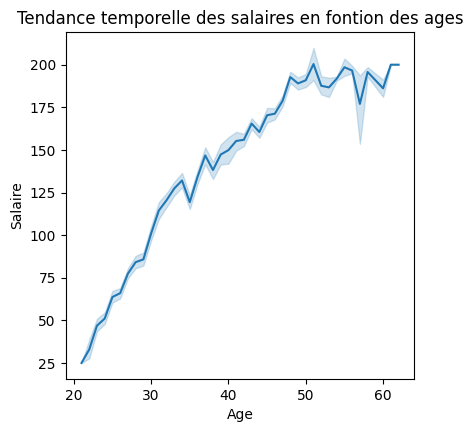

In [18]:
#Graphique linéaire pour illustrer les tendances temporelles des salaires en fontion des ages

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(4.5, 4.5))
sns.lineplot(x='Age', y='Salary', data=age_salaire)
plt.title('Tendance temporelle des salaires en fontion des ages')
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.show()

* **Interpretation**

Il existe une relation positive entre l'âge et le salaire. 

D’ailleurs la pente ascendante de la courbe indique qu'à mesure que l'âge augmente, les salaires ont tendance à augmenter également.

Cela suggère une corrélation positive entre l'âge et le salaire, ce qui est cohérent avec l'idée courante que l'expérience professionnelle et l'expertise croissantes peuvent être récompensées par une rémunération plus élevée.

Ce qui met l’accent sur le fait que lorsque on a fait le tri que ce soit par âge ou par salaire on trouve que les individus plus jeunes ont des salaires plus faibles que les salaires des personnes âgées. 


##### **Chapitre4 : Disparités salariales entre hommes et femmes**

* **Filtrage** 

* Sélection via des indices 

In [6]:
# sélectionner le genre et le salaires:
genre_salaire=donnee.iloc[:, [2,5]]
genre_salaire.head()

Gender  Salary
0    Male    90.0
1  Female    65.0
2    Male   150.0
3  Female    60.0
4    Male   200.0

* **Tri**

In [7]:
# trier selon le salaire :
genre_salaire.sort_values(['Salary'])

Gender   Salary
258     Male    0.350
4615  Female    0.500
1888  Female    0.550
2640    Male    0.579
4488  Female   25.000
...      ...      ...
4258    Male  240.000
4363    Male  240.000
4983    Male  250.000
83      Male  250.000
30      Male  250.000

[6684 rows x 2 columns]

In [8]:
# trier selon le genre:
genre_salaire.sort_values(['Gender'])

Gender  Salary
3341  Female   200.0
3749  Female    55.0
3751  Female    70.0
3753  Female    40.0
3755  Female    75.0
...      ...     ...
1430    Male   155.0
3762    Male    75.0
1429    Male    80.0
3765    Male    60.0
0       Male    90.0

[6684 rows x 2 columns]

* **Analyse descriptive**

In [9]:
#Calculer la moyenne des salaires par genre

moyenne_des_salaires_par_age = donnee.groupby('Gender')['Salary'].mean()
moyenne_des_salaires_par_age.head()


Gender
Female    107.888999
Male      121.395698
Name: Salary, dtype: float64

In [63]:

#Calculer la mediane des salaires par genre

mediane_des_salaires_par_genre= donnee.groupby('Gender')['Salary'].median()
mediane_des_salaires_par_genre.head()


Gender
Female    105.0
Male      120.0
Name: Salary, dtype: float64

In [13]:
#Calculer l'ecart type des salaires par genre

ecart_type_des_salaires_par_genre = donnee.groupby('Gender')['Salary'].std()
ecart_type_des_salaires_par_genre.head()



Gender
Female    52.723610
Male      52.098626
Name: Salary, dtype: float64

* **Graphiques**

In [8]:
palette = ['blue', 'pink']
plt.figure(figsize=(7, 5))
sns.countplot(data=donnee, x="Gender", palette= palette)
plt.title("Distribution des individus par genre", fontname='arial', fontsize=18)
plt.xlabel('Genre', fontname='arial', fontsize=18)
plt.ylabel('Nombre', fontname='arial', fontsize=18)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15132\2209670629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=donnee, x="Gender", palette= palette)


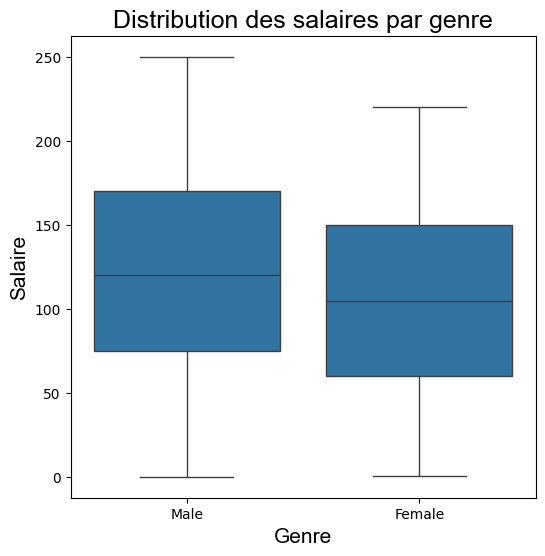

In [9]:
 #Diagramme en boîte pour visualiser la distribution des salaires par genre 
plt.figure(figsize=(6, 6))
sns.boxplot(x='Gender', y='Salary', data=donnee)
plt.title('Distribution des salaires par genre', fontname='arial', fontsize=18)
plt.xlabel('Genre', fontname='arial', fontsize=15)
plt.ylabel('Salaire', fontname='arial', fontsize=15)
plt.show()

* **Interpretation**

•	Le Box plot : 

Le Q2 des hommes plus élevé que celui des femmes dans le box plot indique que la médiane des salaires des hommes est supérieure à celle des femmes.

 Ce qui montre que les hommes ont tendance à occuper des positions salariales plus élevées que les femmes.

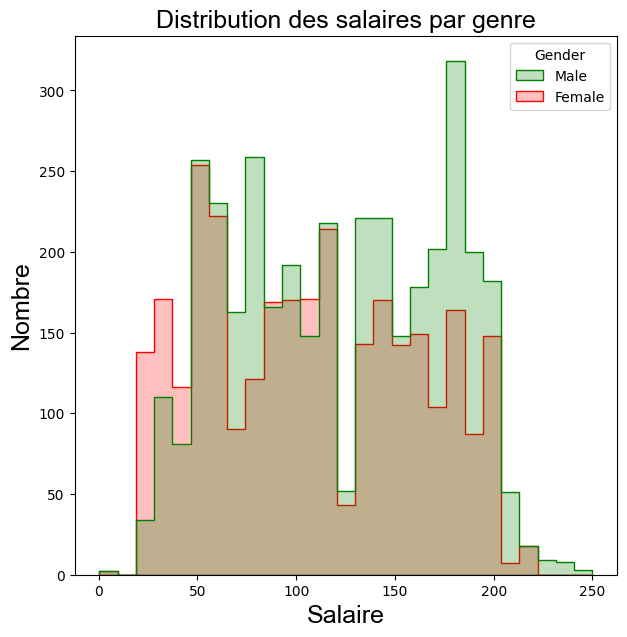

In [82]:
plt.figure(figsize=(7, 7))
sns.histplot(data=donnee, x="Salary", hue="Gender", palette=['green','red'],
             element="step", common_norm=False)

plt.title("Distribution des salaires par genre", fontname='arial', fontsize=18)
plt.xlabel('Salaire', fontname='arial', fontsize=18)
plt.ylabel('Nombre', fontname='arial', fontsize=18)
plt.show()

* **Interpretation**

•	Le diagramme en barre : 

Le fait que presque tous les rectangles représentant les salaires des hommes sont plus élevé que les rectangles des femmes suggère que, en moyenne, les hommes ont des salaires plus élevés que les femmes. 

Cela peut être dû à divers facteurs tels que des écarts salariaux dans les industries spécifiques, des différences de responsabilités au travail, ou d'autres facteurs liés à la discrimination.


##### **Chapitre5 : Impact du niveau d'éducation sur le salaire**

* **Filtrage** 

In [10]:
# sélectionner le niveau d'education et le salaires:
niveau_salaire=donnee.iloc[:, [3,5]]
niveau_salaire.head()

Education Level  Salary
0                1    90.0
1                2    65.0
2                3   150.0
3                1    60.0
4                2   200.0

* **Tri**

In [11]:
# trier selon le salaire :
niveau_salaire.sort_values(['Salary'])

Education Level   Salary
258                 1    0.350
4615                1    0.500
1888                1    0.550
2640                3    0.579
4488                0   25.000
...               ...      ...
4258                3  240.000
4363                3  240.000
4983                1  250.000
83                  3  250.000
30                  1  250.000

[6684 rows x 2 columns]

In [12]:
# trier selon le niveau d'education:
niveau_salaire.sort_values(['Education Level'])

Education Level  Salary
6683                0    35.0
3698                0    30.0
3706                0    35.0
5505                0    25.0
3713                0    30.0
...               ...     ...
1391                3   185.0
4363                3   240.0
1392                3   190.0
1395                3   180.0
3341                3   200.0

[6684 rows x 2 columns]

* **Analyse descriptive**

In [13]:
#Calculer la moyenne des salaires par niveau d'education 

moyenne_des_salaires_par_niveau_d_education  = donnee.groupby('Education Level')['Salary'].mean()
moyenne_des_salaires_par_niveau_d_education.head()



Education Level
0     34.415612
1     95.082909
2    130.078385
3    165.651458
Name: Salary, dtype: float64

In [15]:
#Calculer la mediane des salaires par niveau d'education 

mediane_des_salaires_par_niveau_d_education= donnee.groupby('Education Level')['Salary'].median()
mediane_des_salaires_par_niveau_d_education.head()

Education Level
0     30.0
1     80.0
2    130.0
3    170.0
Name: Salary, dtype: float64

In [16]:
#Calculer l'ecart type des salaires par niveau d'education 

ecart_type_des_salaires_par_niveau_d_education = donnee.groupby('Education Level')['Salary'].std()
ecart_type_des_salaires_par_niveau_d_education.head()


Education Level
0    16.563415
1    44.091790
2    40.649724
3    34.339752
Name: Salary, dtype: float64

* **Graphiques**

In [13]:
plt.figure(figsize=(6,6))
plt.bar(height=donnee['Salary'], x=donnee['Education Level'])

#Ajouter un titre et nommé les axes du graphique
plt.title("Distrubution des salaires en fonction du niveau d_education", fontname='arial', fontsize=18)
plt.xlabel("Niveau d_education", fontweight='bold',fontsize=12)
plt.ylabel("Salaire", fontweight='bold', fontsize=12)

# Ajouter un quadriage à notre graphique 
#plt.grid()

# fixer les limites des axes
plt.ylim(0,40)
# etaler les intervalles
plt.yticks([0,50,100,150,200,250,300])

([<matplotlib.axis.YTick at 0x20e10bc90d0>,
 [Text(0, 0, '0'),
  Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200'),
  Text(0, 250, '250'),
  Text(0, 300, '300')])

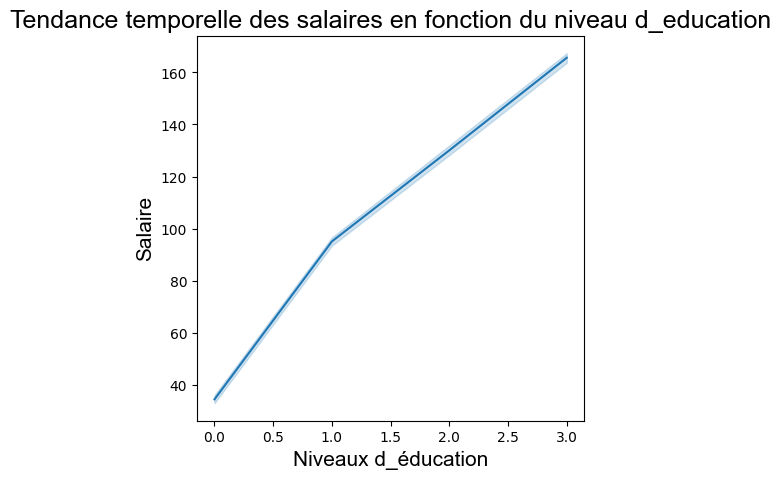

In [12]:
#Graphique linéaire pour illustrer les tendances temporelles des salaires en fontion des niveaux d'education

plt.figure(figsize=(5, 5))
sns.lineplot(x='Education Level', y='Salary', data=donnee)
plt.title("Tendance temporelle des salaires en fonction du niveau d_education",  fontname='arial', fontsize=18)
plt.xlabel('Niveaux d_éducation',fontname='arial', fontsize=15 )
plt.ylabel('Salaire',fontname='arial', fontsize=15)
plt.show()

* **Interpretation**

•	Le graphique linéaire


Le graphique linéaire montre une tendance haussière des salaires en fonction du niveau d'éducation. 
Cela signifie que avec un niveau d'éducation plus élevé, les salaires tendent à être plus élevés également. Cette relation de cause à effet indique que l'éducation est un facteur déterminant pour la rémunération financière d'un travailleur.


In [23]:
# Visualization - Box plot
palette=['green','red','blue','pink']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Salary', data=donnee, palette=palette)
plt.title('Relation entre le salaire et le niveau d_education')
plt.xlabel('Niveau d_education')
plt.ylabel('Salaire')
plt.xticks(ha='right')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_26816\3050666820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Salary', data=donnee, palette=palette)


* **Interpretation**

•	Le box plot


Le graphique box plot est utilisé pour visualiser la répartition des salaires en fonction du niveau d'éducation. Il permet de comparer les quartiles des salaires pour chaque niveau d'éducation. 

Par exemple, le boxplot montre que les salaires des travailleurs avec un niveau d'éducation égale à 1 sont généralement inférieurs aux salaires des travailleurs avec un niveau d'éducation égale à 2 .


En résumé, la relation entre le niveau d'éducation et le salaire est positive, avec un effet de cause à effet.
 
Avec un niveau d'éducation plus élevé, les salaires tendent à être plus élevés. Cependant, il est important de noter que d'autres facteurs peuvent également influencer les salaires, tels que l'expérience professionnelle, les compétences en négociation, la localisation géographique, etc.


##### **Chapitre6 : Influence du pays d'origine sur le salaire**

* **Filtrage** 

In [57]:
# sélectionner le pays et le salaires:
pays_salaire=donnee.iloc[:, [6,5]]
pays_salaire.head()

Country  Salary
0      UK    90.0
1     USA    65.0
2  Canada   150.0
3     USA    60.0
4     USA   200.0

* **Tri**

In [60]:
# trier selon le salaire :
pays_salaire.sort_values(['Salary'])

Country   Salary
258      USA    0.350
4615     USA    0.500
1888      UK    0.550
2640      UK    0.579
4488      UK   25.000
...      ...      ...
4258  Canada  240.000
4363  Canada  240.000
4983  Canada  250.000
83    Canada  250.000
30    Canada  250.000

[6684 rows x 2 columns]

In [59]:
# trier selon le pays
pays_salaire.sort_values(['Country'])

Country  Salary
5693  Australia   160.0
1709  Australia   110.0
3306  Australia    75.0
5874  Australia   110.0
976   Australia   195.0
...         ...     ...
5358        USA   120.0
5357        USA   100.0
2710        USA    60.0
2718        USA   160.0
3341        USA   200.0

[6684 rows x 2 columns]

* **Analyse descriptive**

In [64]:
#Calculer la moyenne des salaires par pays

moyenne_des_salaires_par_pays = donnee.groupby('Country')['Salary'].mean()
moyenne_des_salaires_par_pays.head()


Country
Australia    114.925465
Canada       116.455091
China        116.282590
UK           115.919917
USA          112.998758
Name: Salary, dtype: float64

In [65]:
#Calculer la mediane des salaires par pays

mediane_des_salaires_par_pays= donnee.groupby('Country')['Salary'].median()
mediane_des_salaires_par_pays.head()

Country
Australia    115.00
Canada       120.00
China        115.92
UK           115.00
USA          110.00
Name: Salary, dtype: float64

In [66]:
#Calculer l'ecart type des salaires par pays

ecart_type_des_salaires_par_pays= donnee.groupby('Country')['Salary'].std()
ecart_type_des_salaires_par_pays.head()

Country
Australia    53.867507
Canada       53.447945
China        51.760385
UK           53.049216
USA          51.901386
Name: Salary, dtype: float64

* **Graphiques**

([<matplotlib.axis.YTick at 0x2643c7599a0>,
 [Text(0, 0, '0'),
  Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200'),
  Text(0, 250, '250'),
  Text(0, 300, '300')])

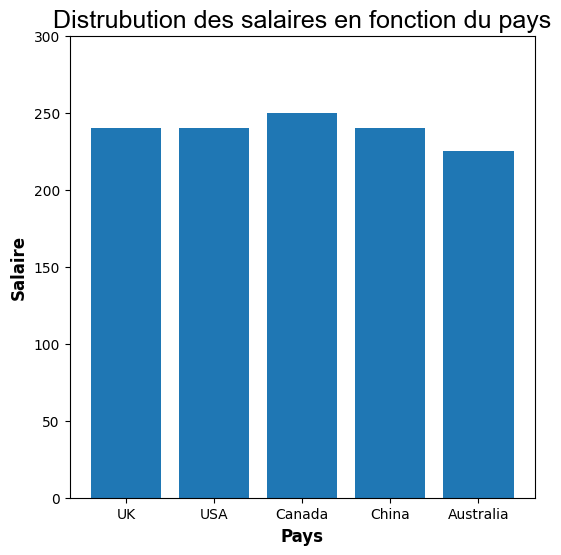

In [28]:
plt.figure(figsize=(6,6))
plt.bar(height=donnee['Salary'], x=donnee['Country'])

#Ajouter un titre et nommé les axes du graphique
plt.title("Distrubution des salaires en fonction du pays", fontname='arial', fontsize=18)
plt.xlabel("Pays", fontweight='bold',fontsize=12)
plt.ylabel("Salaire", fontweight='bold', fontsize=12)

# Ajouter un quadriage à notre graphique 
#plt.grid()

# fixer les limites des axes
plt.ylim(0,40)
# etaler les intervalles
plt.yticks([0,50,100,150,200,250,300])

* **Interprétation**

•	Le graphique en Barre 

Tous les rectangles des pays ont la même hauteur, cela suggère visuellement que le salaire moyen est similaire pour tous les pays. Cette représentation graphique peut être utilisée pour indiquer que, à première vue, il n'y a pas de variations significatives dans les salaires entre les pays.

C:\Users\DELL\AppData\Local\Temp\ipykernel_26816\3123573510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Salary', data=donnee, palette=palette)


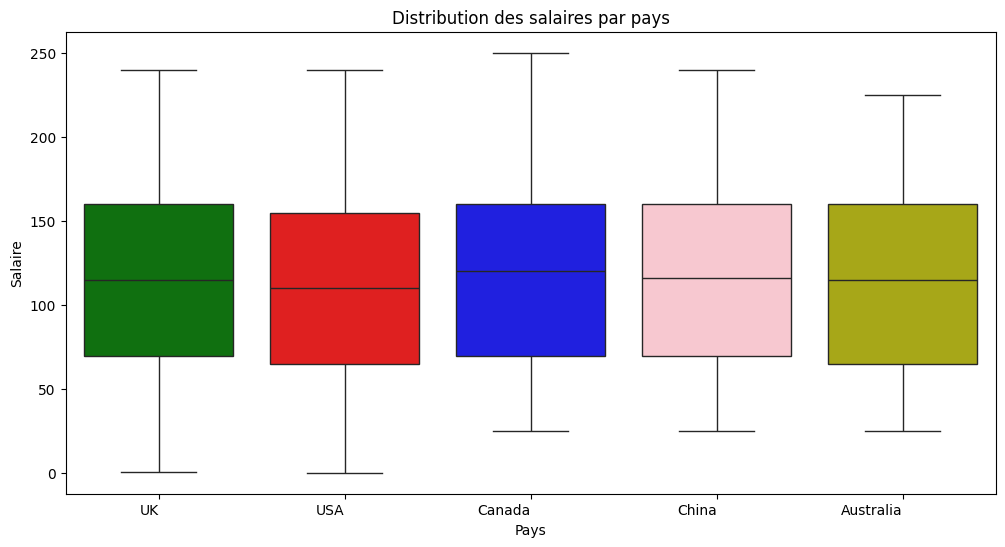

In [31]:
# Visualization - Box plot
palette=['green','red','blue','pink','y']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Salary', data=donnee, palette=palette)
plt.title('Distribution des salaires par pays')
plt.xlabel('Pays')
plt.ylabel('Salaire')
plt.xticks(ha='right')
plt.show()

* **Interpretation**

•	Le Box Plot 

La similarité des Q2 dans le graphique box plot indique que la médiane des salaires est presque la même pour tous les pays. Cela renforce visuellement l'idée que le pays n'a pas une influence majeure sur le salaire.


##### **Chapitre7 : Effet de l'expérience professionnelle sur le salaire**

* **Filtrage** 

In [58]:
# sélectionner l'experience et le salaires:
experience_salaire=donnee.iloc[:, [4,5]]
experience_salaire.head()

Years of Experience  Salary
0                  5.0    90.0
1                  3.0    65.0
2                 15.0   150.0
3                  7.0    60.0
4                 20.0   200.0

* **Tri**

In [61]:
# trier selon le salaire :
experience_salaire.sort_values(['Salary'])

Years of Experience   Salary
258                   1.5    0.350
4615                  4.0    0.500
1888                  1.0    0.550
2640                  1.0    0.579
4488                  1.0   25.000
...                   ...      ...
4258                 24.0  240.000
4363                 24.0  240.000
4983                 21.0  250.000
83                   24.0  250.000
30                   25.0  250.000

[6684 rows x 2 columns]

In [62]:
# trier selon les années d'experience
experience_salaire.sort_values(['Years of Experience'])

Years of Experience   Salary
5115                  0.0   25.000
5039                  0.0   25.000
2505                  0.0   51.832
5758                  0.0   28.000
5298                  0.0   25.000
...                   ...      ...
2471                 33.0  191.790
2396                 33.0  191.790
2504                 33.0  188.232
2415                 34.0  188.651
2490                 34.0  188.651

[6684 rows x 2 columns]

* **Analyse descriptive**

In [68]:
#Calculer la moyenne des salaires par années d'experience

moyenne_des_salaires_par_experience = donnee.groupby('Years of Experience')['Salary'].mean()
moyenne_des_salaires_par_experience.head()

Years of Experience
0.0    29.680233
0.5    35.000000
1.0    46.992846
1.5    36.279167
2.0    58.651652
Name: Salary, dtype: float64

In [69]:
#Calculer la mediane des salaires par années d'experience

mediane_des_salaires_par_experience= donnee.groupby('Years of Experience')['Salary'].median()
mediane_des_salaires_par_experience.head()

Years of Experience
0.0    25.0
0.5    35.0
1.0    40.0
1.5    37.5
2.0    55.0
Name: Salary, dtype: float64

In [70]:
#Calculer l'ecart type des salaires par années d'experience

ecart_type_des_salaires_par_experience = donnee.groupby('Years of Experience')['Salary'].std()
ecart_type_des_salaires_par_experience.head()


Years of Experience
0.0     9.723695
0.5          NaN
1.0    20.786732
1.5    12.361918
2.0    22.795411
Name: Salary, dtype: float64

In [14]:
#Graphique linéaire pour illustrer les tendances temporelles des salaires en fontion des années d'experience
plt.figure(figsize=(5, 5))
sns.lineplot(x='Years of Experience', y='Salary', data=donnee)
plt.title("Tendance temporelle des salaires en fonction des années d_experience", fontname='arial', fontsize=18)
plt.xlabel('années d_experience',fontname='arial', fontsize=15)
plt.ylabel('Salaire',fontname='arial', fontsize=15)
plt.show()

* **Interprétation**

•	Graphique Linéaire :

Nous remarquons une tendance haussière qui suggère qu'il existe une relation linéaire positive entre les années d'expérience et le salaire. Cela signifie que, en moyenne, le salaire a tendance à augmenter à mesure que le nombre d'années d'expérience augmente.


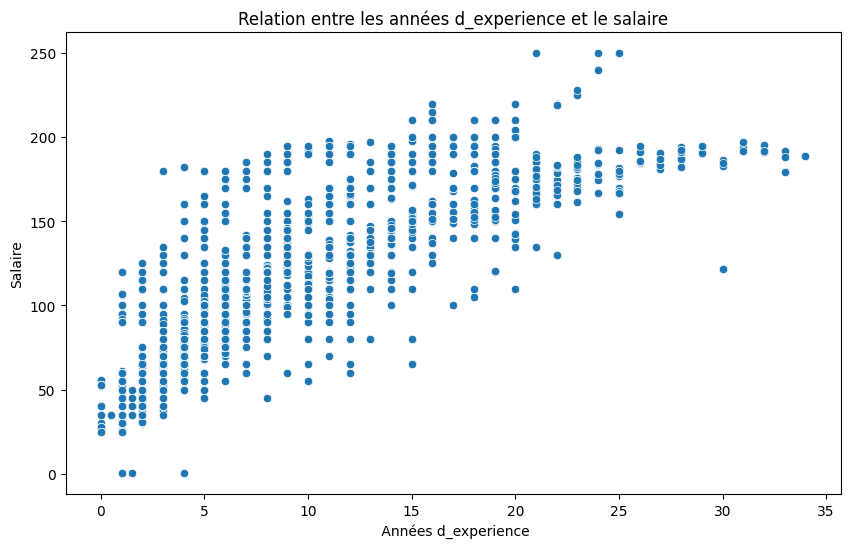

Correlation Coefficient: 0.8109415749328708


In [15]:
# Visualisation du Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=donnee)
plt.title('Relation entre les années d_experience et le salaire')
plt.xlabel(' Années d_experience')
plt.ylabel('Salaire')
plt.show()

# Correlation
correlation_coefficient = donnee['Years of Experience'].corr(donnee['Salary'])
print(f'Correlation Coefficient: {correlation_coefficient}')

* **Interprétation**

•	Scatter Plot 

Nous remarquons une tendance haussière qui indique également une relation positive entre les années d'expérience et le salaire.
 Ce graphique permet également de voir la dispersion des données individuelles.
Les points dispersés autour de la tendance peuvent montrer la variabilité des salaires pour un même nombre d'années d'expérience. Cela pourrait être dû à d'autres facteurs qui influent sur les salaires, comme l'éducation, les compétences spécifiques, la géographie, etc.


##### **Chapitre 8 : Conclusions et prise de décisions :**

* **Conclusions**

La distribution des salaires, telle qu'observée à travers l'analyse de variables démographiques et professionnelles, offre des informations cruciales pour la prise de décision en matière de rémunération et de gestion des ressources humaines. Voici une interprétation générale basée sur les observations précédentes :.


1.	Influence de l'Âge :
La relation entre l'âge et le salaire est positive, indiquant que les salaires augmentent avec l'âge. Cela peut être dû à l'accumulation d'expérience professionnelle et à l'acquisition de compétences spécifiques avec le temps.
L'âge semble jouer un rôle significatif dans la distribution des salaires. La corrélation positive entre l'âge et le salaire indique que, en moyenne, les salaires ont tendance à augmenter avec l'expérience professionnelle. Cette information est essentielle pour ajuster les politiques de rémunération en fonction des différentes tranches d'âge. Il peut être bénéfique de mettre en place des programmes de développement professionnel pour favoriser la progression des salariés tout au long de leur carrière.

2.	Inégalités Hommes-Femmes :
Les hommes ont tendance à occuper des positions salariales plus élevées que les femmes, avec un Q2 des hommes supérieur à celui des femmes. Cela peut être dû à des écarts salariaux dans les industries spécifiques, des différences de responsabilités au travail, ou d'autres facteurs liés à la discrimination.
Les inégalités salariales entre hommes et femmes nécessitent une attention particulière. La constatation que les hommes ont tendance à occuper des positions salariales plus élevées souligne l'importance de mettre en œuvre des politiques d'égalité salariale. Cela peut impliquer des initiatives visant à réduire les écarts salariaux, à promouvoir l'équité des opportunités et à encourager la diversité au sein de l'organisation.




3.	Impact du Niveau d'Éducation :
La relation entre le niveau d'éducation et le salaire est positive, avec un effet de cause à effet. Avec un niveau d'éducation plus élevé, les salaires tendent à être plus élevés. Cela indique que l'éducation est un facteur déterminant pour la rémunération financière d'un travailleur.
L'éducation semble être un déterminant clé de la distribution des salaires. La tendance haussière des salaires avec un niveau d'éducation plus élevé met en évidence l'importance de soutenir le développement académique des employés. Les programmes de formation continue et les incitations à l'apprentissage peuvent contribuer à maintenir un niveau élevé de compétences au sein de l'entreprise.




4.	Facteur Géographique :
Les salaires moyens sont similaires pour tous les pays, avec une légère préférence pour les salaires des personnes travaillant dans certains pays. Cela suggère que le pays n'a pas une influence majeure sur le salaire.
La similarité des salaires entre les pays suggère que, visuellement du moins, le pays d'origine ne semble pas influencer de manière significative la distribution des salaires. Cependant, il est crucial de tenir compte des différences de coût de la vie et des normes du marché du travail lors de l'élaboration de politiques de rémunération globales.



5.	Expérience Professionnelle :
 La tendance haussière entre les années d'expérience et le salaire indique une relation linéaire positive entre les deux variables. Cela signifie que, en moyenne, le salaire a tendance à augmenter à mesure que le nombre d'années d'expérience augmente
L'expérience professionnelle a un impact positif sur la distribution des salaires, soulignant l'importance de reconnaître et de récompenser l'expertise acquise au fil des années. Les programmes de reconnaissance des compétences et les avantages liés à l'ancienneté peuvent contribuer à fidéliser les employés expérimentés.


* **Prise de décisions**

En prenant en compte des observations, la prise de décision relative à la distribution des salaires pourrait inclure les points suivants :




    •	Mettre en place des politiques de rémunération compétitives qui reconnaissent l'expérience et l'expertise.

    •	Promouvoir l'égalité salariale entre hommes et femmes en identifiant et en éliminant les écarts injustifiés.        

    •	Investir dans des programmes de développement professionnel pour soutenir l'éducation continue des employés.

    •	Adapter les politiques de rémunération en fonction des besoins spécifiques des différentes tranches d'âge.  

    •	Prendre en compte les normes internationales du marché du travail lors de l'élaboration de politiques salariales pour les employés travaillant dans des pays différents.




En fin de compte, une approche holistique tenant compte de ces facteurs contribuera à établir une politique de rémunération équitable, compétitive et alignée sur les objectifs stratégiques de l'entreprise.
